# Keras tutorial

In [1]:
! git clone https://github.com/btlgs2000/dl_intro

Cloning into 'dl_intro'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 83 (delta 42), reused 48 (delta 18), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [4]:
import random

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

from dl_intro.utils import display_samples, take_test_samples_idxs

## MNIST Dataset

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train[0].shape

(28, 28)

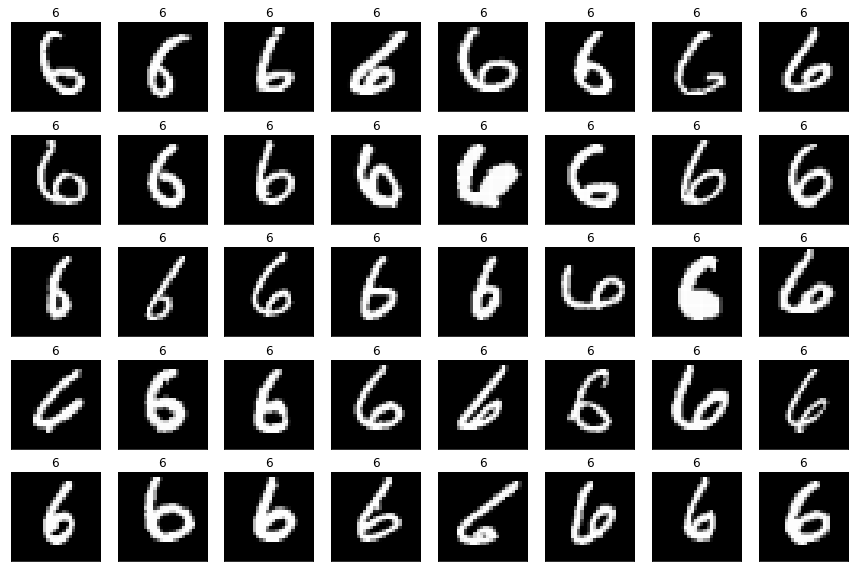

In [7]:
display_samples(x_train, y_train, n_rows=5, n_cols=8, label=6)

## MLP con modello sequenziale

### lista di strati passati al costruttore

In [8]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### Costruzione con il metodo add

In [10]:
model = keras.Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

### sommario

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### plot

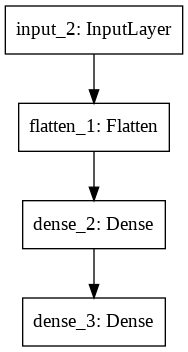

In [12]:
keras.utils.plot_model(model)

### compilazione

La compilazione prepara il modello per l'addestramento.
Vengono definiti:
* il metodo di ottimizzazione
* la funzione di loss
* eventuali metriche

In [13]:
sgd = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

### addestramento

In [14]:
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='tensorboard_logs', histogram_freq=1, write_graph=True, write_images=True),
    tf.keras.callbacks.ModelCheckpoint('tensorboard_logs/weights.{epoch:02d}-{val_loss:.2f}.tf', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

In [15]:
h = model.fit(x=x_train, y=tf.one_hot(y_train, 10), batch_size=32, epochs=10, validation_split=0.1, callbacks=callbacks)

Epoch 1/10
   1/1688 [..............................] - ETA: 0s - loss: 171.7266 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1688/1688 [==============================] - 3s 2ms/step - loss: 1.6792 - accuracy: 0.7719 - val_loss: 0.5408 - val_accuracy: 0.8583
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4579 - accuracy: 0.8842 - val_loss: 0.3517 - val_accuracy: 0.9097
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3510 - accuracy: 0.9059 - val_loss: 0.2978 - val_accuracy: 0.9198
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.9173 - val_loss: 0.2619 - val_accuracy: 0.9280
Epoch 5/10
1688/1688 [==============================] - 3s

### test

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
val_loss, val_accuracy = model.evaluate(x=x_test, y=tf.one_hot(y_test, 10), batch_size=32)

313/313 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.9283


### predizione

In [18]:
y_prob = model.predict(x=x_test)

In [19]:
y_hat = np.argmax(y_prob, axis=1)

## esame della predizione

### predizioni corrette con maggiore confidenza

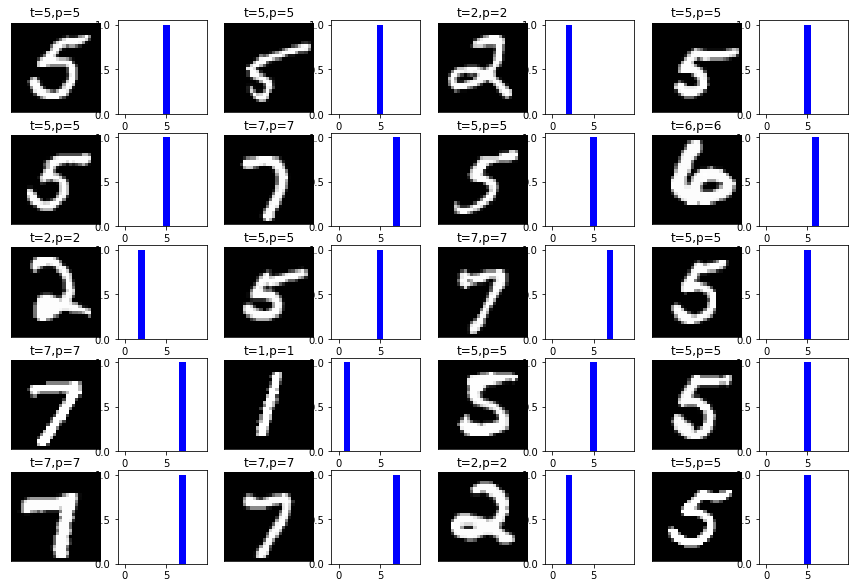

In [20]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=True, most_confident=True, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni corrette con minore confidenza

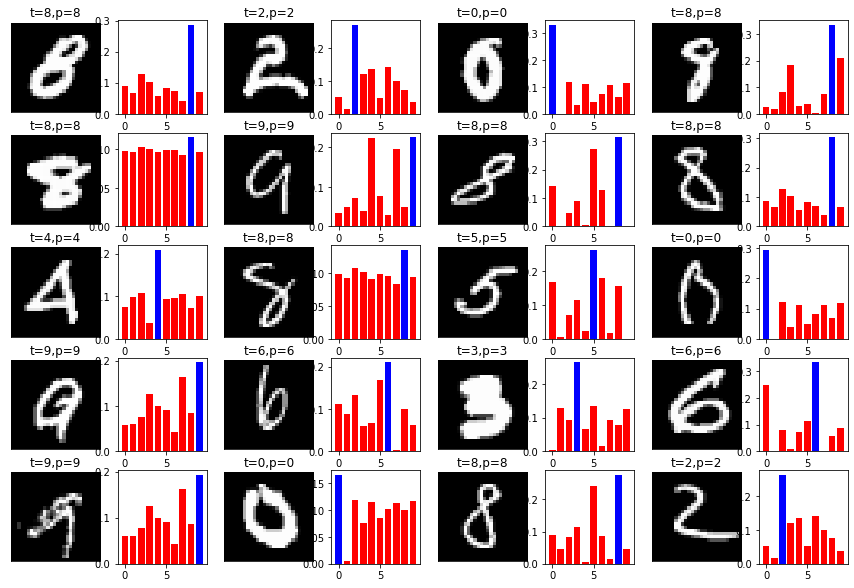

In [21]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=True, most_confident=False, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni errate con maggiore confidenza

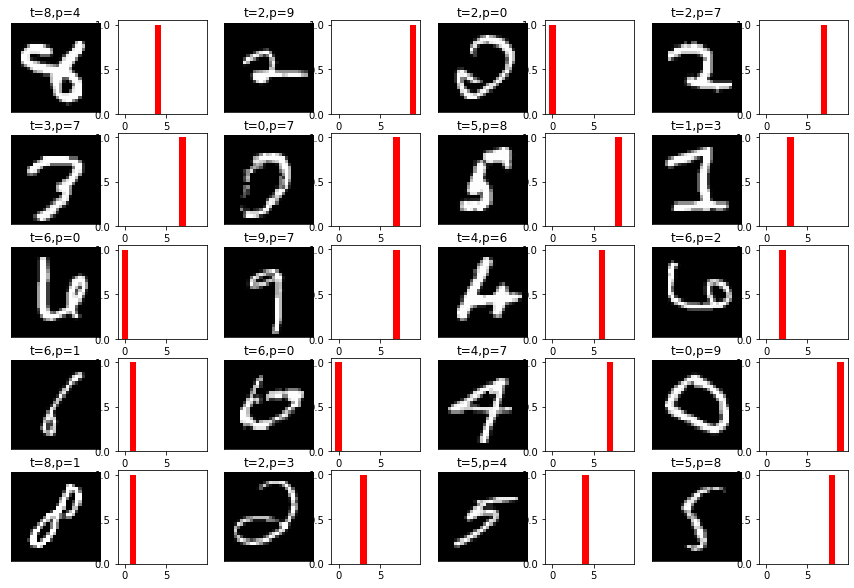

In [22]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=False, most_confident=True, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)

### predizioni errate con minore confidenza

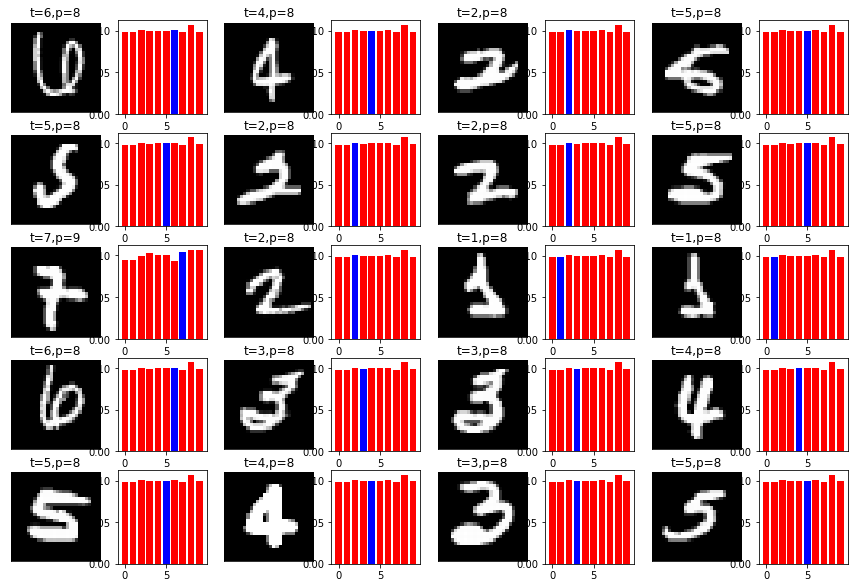

In [23]:
idxs = take_test_samples_idxs(y_prob, y_test, is_correct=False, most_confident=False, k=5*4)
display_samples(x_test[idxs], y_test[idxs], y_hat[idxs], y_prob[idxs], n_rows=5, n_cols=4)